# Decision Tree - Karar Ağacı Algoritması

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("ilac_tahmin.csv")
df.head()

,Yas,Cinsiyet,Tansiyon,Kolestrol,SoPo_Oran,İlaç
0,23,K,YÜKSEK,YÜKSEK,25.355,ilacY
1,47,E,DÜŞÜK,YÜKSEK,13.093,ilacC
2,47,E,DÜŞÜK,YÜKSEK,10.114,ilacC
3,28,K,NORMAL,YÜKSEK,7.798,ilacX
4,61,K,DÜŞÜK,YÜKSEK,18.043,ilacY


## Verinin Hazırlanması

Scikit-Learn ile modelimizi eğitmeden önce tahmin edeceğimiz özellik "ilaç" ve diğer özellikleri iki ayrı değişkene atayacağız. X tahmin için kullanacağımız özelliklerden oluşan matris olacak. y ise tahmmin edeceğimiz veriden oluşan bir vektör olacak.

In [3]:
X=df[["Yas","Cinsiyet","Tansiyon","Kolestrol","SoPo_Oran"]].values
X[0:5]

array([[23, 'K', 'YÜKSEK', 'YÜKSEK', 25.355],
       [47, 'E', 'DÜŞÜK', 'YÜKSEK', 13.093],
       [47, 'E', 'DÜŞÜK', 'YÜKSEK', 10.113999999999999],
       [28, 'K', 'NORMAL', 'YÜKSEK', 7.797999999999999],
       [61, 'K', 'DÜŞÜK', 'YÜKSEK', 18.043]], dtype=object)

Sklearn Decision Tree Algoritması kategorik verileri analiz edemiyor. Bu sebeple Cinsiyet, Tansiyon,Kolestrol verilerini sayısal kategorik verilere çevirmemiz gerekiyor. Bunu sağlamak için ***pandas.get_dummies()*** medtodunu kullanırız.

In [4]:
from sklearn import preprocessing

label_cins=preprocessing.LabelEncoder()
label_cins.fit(["K","E"])
X[:,1]=label_cins.transform(X[:,1])

label_tans=preprocessing.LabelEncoder()
label_tans.fit(["YÜKSEK","DÜŞÜK","NORMAL"])
X[:,2]=label_tans.transform(X[:,2])

label_kol=preprocessing.LabelEncoder()
label_kol.fit(["YÜKSEK","NORMAL"])
X[:,3]=label_kol.transform(X[:,3])

In [5]:
X[0:5]

array([[23, 1, 2, 1, 25.355],
       [47, 0, 0, 1, 13.093],
       [47, 0, 0, 1, 10.113999999999999],
       [28, 1, 1, 1, 7.797999999999999],
       [61, 1, 0, 1, 18.043]], dtype=object)

In [6]:
y=df[["İlaç"]].values
y[0:5]

array([['ilacY'],
       ['ilacC'],
       ['ilacC'],
       ['ilacX'],
       ['ilacY']], dtype=object)

## Modelin Kurulması

Öncelikli olarak verimizi train ve test olarak iki kısma ayıracağız. Yani elimizide X_train, X_test, y_train y_test olmak üzere 4 veri seti olacak.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3)

Oluşturduğumuz veri setlerinin boyutlarının analiz için birbiri ile uyumlu olması gerekiyor.

In [9]:
print("X_train boyut:",X_train.shape," y_train boyut:",y_train.shape)
print("X_test boyut:",X_test.shape," y_test boyut:",y_test.shape)

X_train boyut: (140, 5)  y_train boyut: (140, 1)
X_test boyut: (60, 5)  y_test boyut: (60, 1)


İlk olarak ilacTree isminde bir ***DecisionTreeClassifier*** instance oluşturacağız. Bu instance içinde, her bir düğümün information gain değerini görebilmemiz için ***criterion="entropy"*** olarak tanımlayacağız.

In [11]:
ilacTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
ilacTree # Aşağıda default parametreleri göreceğiz.

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Artık modeli eğitebiliriz.

In [12]:
ilacTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Tahmin & Değerlendirme

Yukarıda oluşturmuş olduğumuz modeli kullanarak tahmin yapalım ve sonucları bir değişkende toplayalım.

In [13]:
ilacTahmin=ilacTree.predict(X_test)

In [14]:
ilacTahmin[0:5]

array(['ilacY', 'ilacX', 'ilacX', 'ilacX', 'ilacX'], dtype=object)

In [15]:
y_test[0:5]

array([['ilacY'],
       ['ilacX'],
       ['ilacX'],
       ['ilacX'],
       ['ilacX']], dtype=object)

İlk beş değer için mükemmel çalıştı :)

***Değerlendirme***

In [16]:
from sklearn import metrics
print ("Karar Ağacı Modeli Accuracy: ",metrics.accuracy_score(y_test,ilacTahmin))

Karar Ağacı Modeli Accuracy:  0.9833333333333333


Tüm test verisi üzerinden modelimizin başarımı %98 gibi gayet iyi bir değer verdi.

## Karar ağacı modelinin görselleştirilmesi

Modelin oluşturdurğu karar ağacı modeline incelemek istersek onu bir resim olarak görüntüleyebiliriz.

In [25]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline 

In [22]:
# Eğer gerekli olursa.
# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

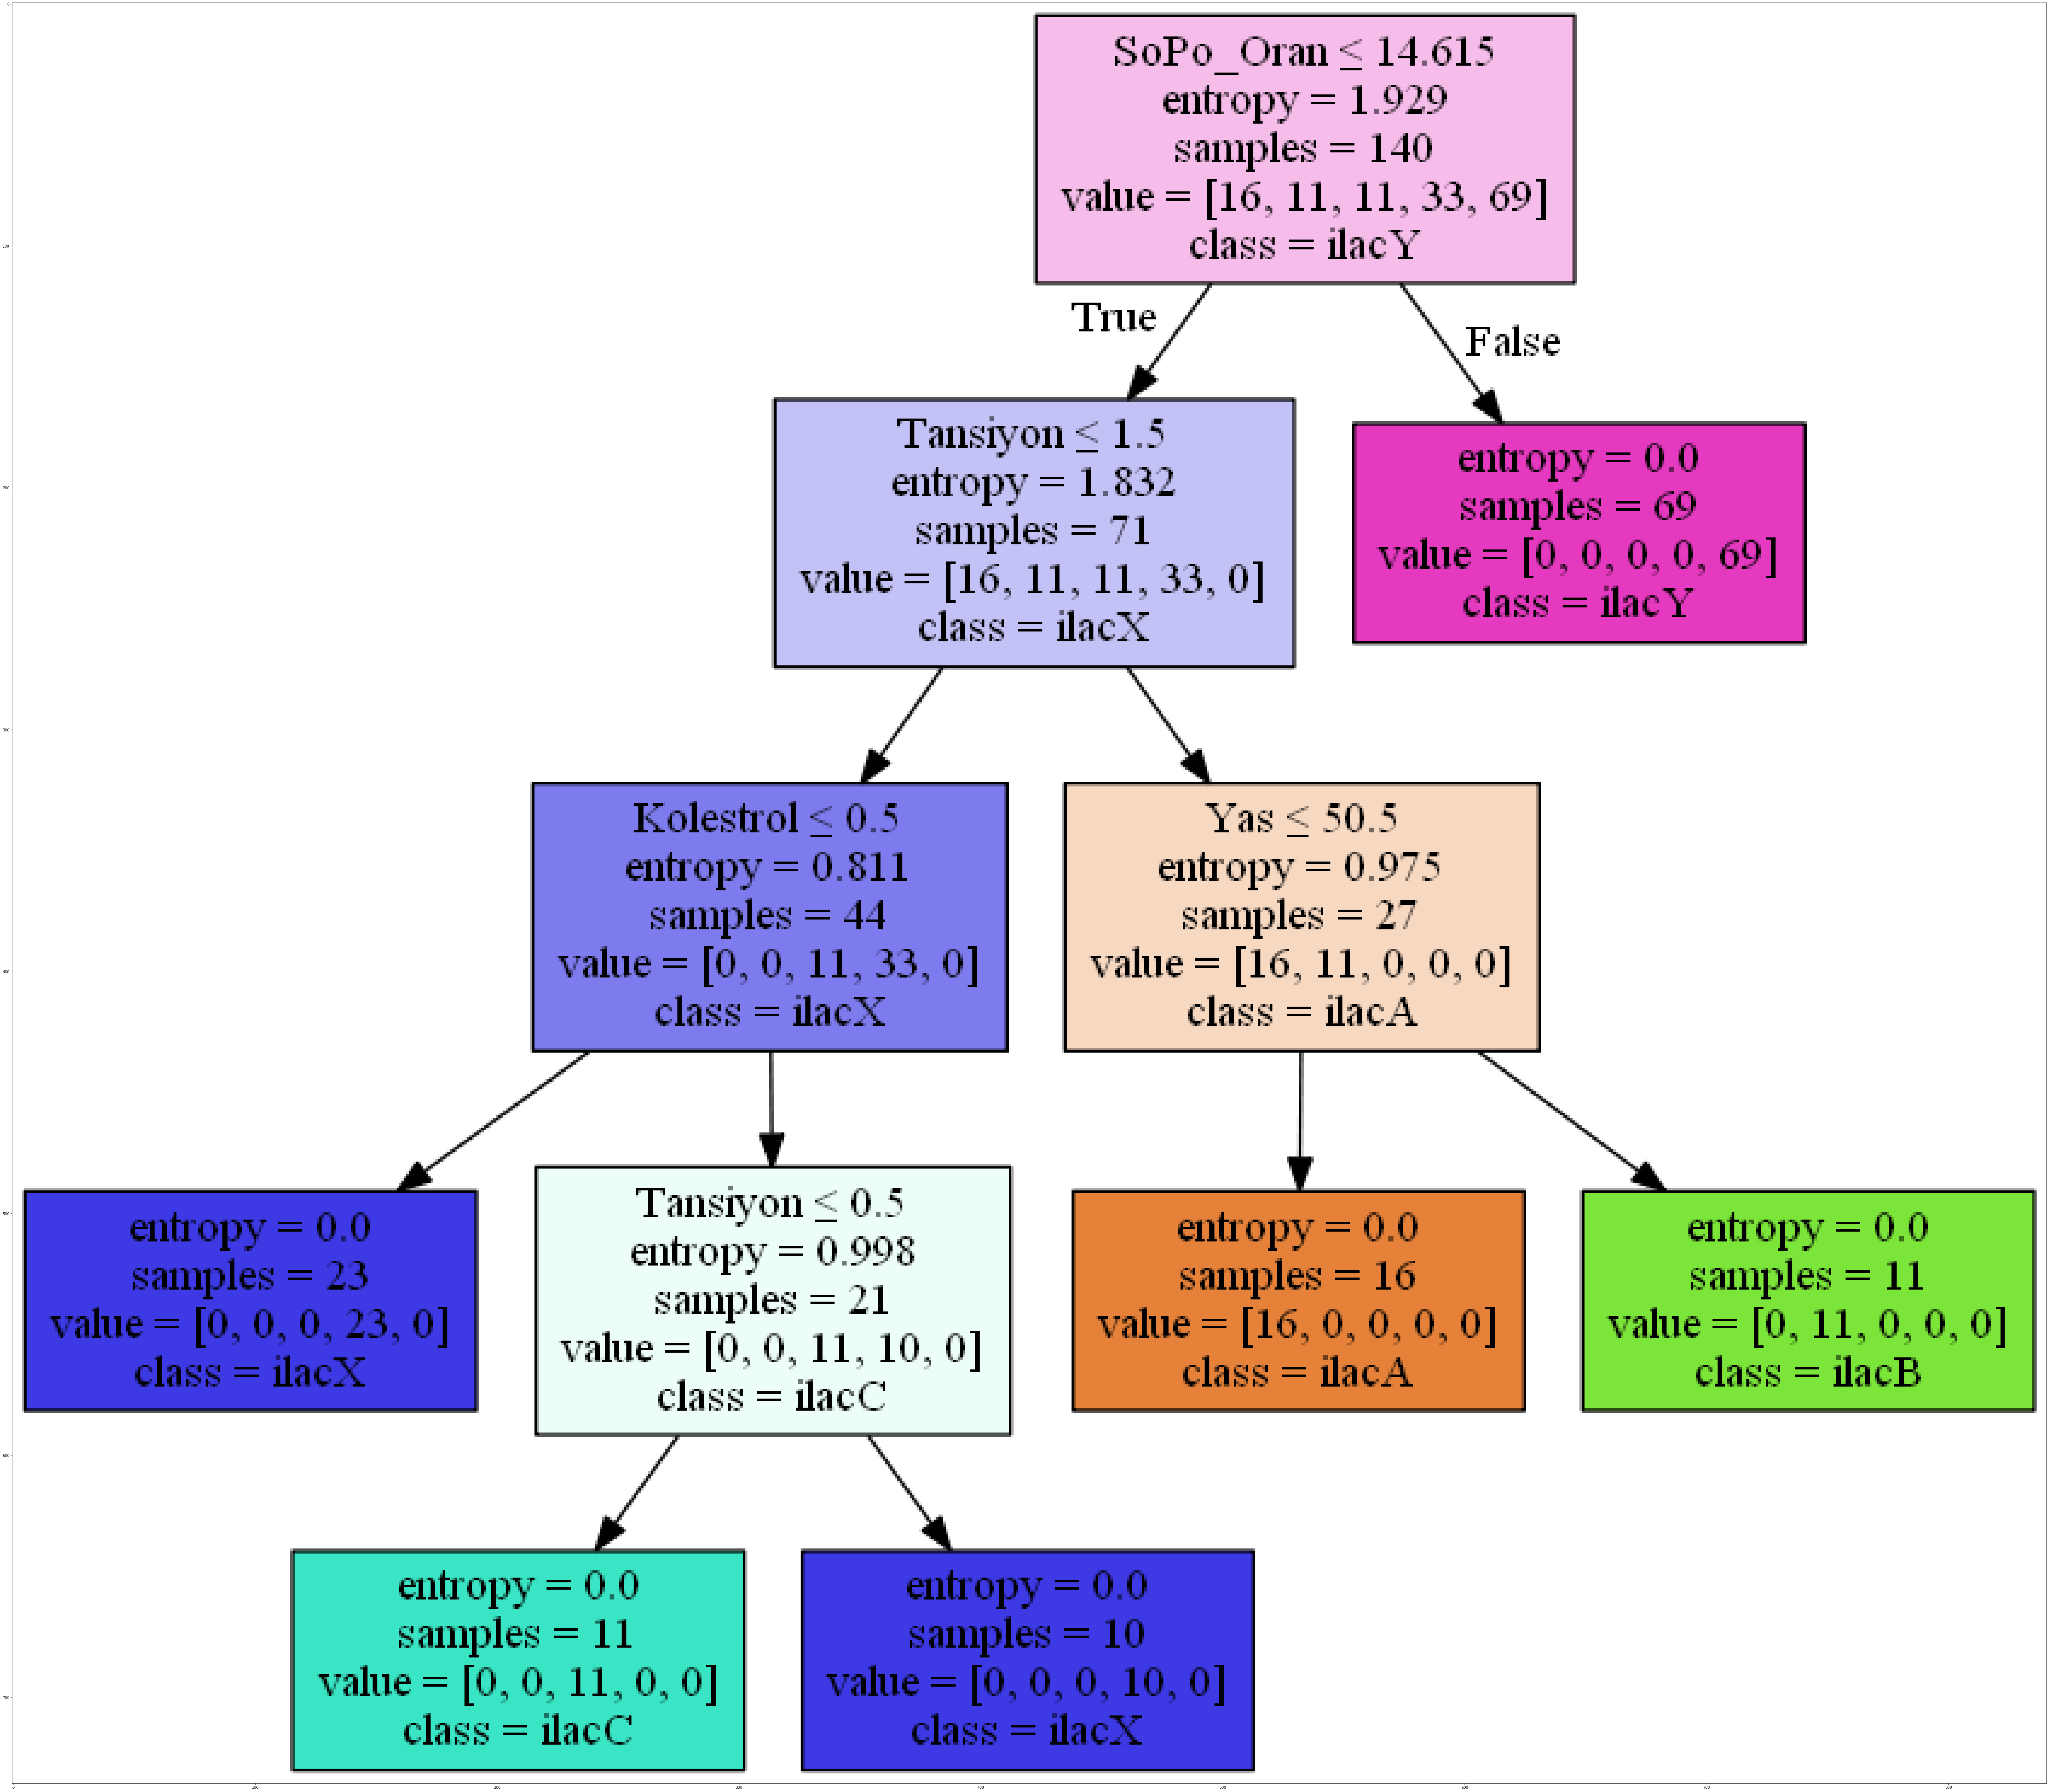

In [26]:
dot_data = StringIO()
filename = "ilactree.png"
featureNames = df.columns[0:5]
targetNames = df["İlaç"].unique().tolist()
out=tree.export_graphviz(ilacTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')